# ヒストグラム その1: 計算して，プロットして，解析する !!!
## 目的
このチュートリアルでは
* OpenCvとNumPyの両方の関数を使ってヒストグラムを計算する方法を学ぶ．
* OpenCVとMatplotlibの関数を使ってヒストグラムをプロットする方法を学ぶ．
* 次の関数の使い方を学ぶ : [cv2.calcHist()](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/histograms.html?highlight=cv2.calchist#cv2.calcHist), [np.histogram()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) etc.

## 理論
ヒストグラムとは、画像中の画素値の全体的な分布を知るためのグラフやプロットと考えることができる．横軸に画素値(大抵の場合0から255の値を持つ)，縦軸に画素値の出現頻度をプロットしたものである．ヒストグラムをこのように可視化することは、画像を理解する一つの方法である．ヒストグラムを見れば画像のコントラスト，明るさ，画素値の分布などが直観的に理解できるからである．今日利用できる画像処理ソフトのほとんどがヒストグラムに関する機能を持っている．次に示す画像は [Cambridge in Color website](http://www.cambridgeincolour.com/tutorials/histograms1.htm) から取り出したものの1枚である．詳細についてはサイトを参照すること．

![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/histogram_sample.jpg)

画像とそのヒストグラムを比べてみよう(このヒストグラムはグレースケール画像のヒストグラムであり，カラー画像のヒストグラムではないことに注意)．ヒストグラムの左側の領域は画像の中の暗い画素の出現頻度，右側の領域は画像の中の明るい画素の出現頻度を表している．このヒストグラムから、この画像は暗い領域の方が多いことや、画素値の中間領域(ここでは127付近)の画素はほとんどないことなどが分かる．


##  ヒストグラムの計算
ヒストグラムがどんなものであるか分かったこととして，次は計算方法について学ぼう．このための関数を，OpenCvとNumpyはそれぞれ用意している．ただし、これらの関数を使う前にヒストグラムに関する専門用語を理解する必要がある．

__BINS(ビン)__ :上に示したヒストグラムは全画素値(0から255)の画素数を表示しており，合計256個の数値が必要である．しかし，画素値それぞれの頻度（画素数）ではなく、画素値のある範囲ごとの頻度を知りたいとしよう．例えば0から15，16から31, ..., 240から255の範囲での画素値を持つ画素の出現頻度を知りたいとする。このヒストグラムを表すために必要なのはたったの16個の数だけである．これがまさに [OpenCVのヒストグラムのチュートリアル(英語版)](http://docs.opencv.org/doc/tutorials/imgproc/histograms/histogram_calculation/histogram_calculation.html#histogram-calculation) の例である(下図はそこから拝借)．

![](http://docs.opencv.org/2.4/_images/Histogram_Calculation_Theory_Hist0.jpg)
![](http://docs.opencv.org/2.4/_images/Histogram_Calculation_Theory_Hist1.jpg)

このためにすべき作業は、ヒストグラム全体を16個の小領域に分割し，それぞれの小領域の画素数の合計値を計算することである．この小領域のことを “ビン(BIN)” と呼ぶ．最初の例ではビンの数は256(各ビンが各画素値に対応)，二番目の例ではビンの数は16である．OpenCVのドキュメント中ではビンの数は `histSize` と呼ばれている．

__DIMS(次元数)__ : 扱うデータがもつパラメタの個数である．今回の例では1つの値(画素値)だけを持つデータを扱っている．それゆえ、この例では1である．

__RANGE(ビン境界)__ : 計測対象の値の範囲を表す．通常は画素値の全範囲、すなわち `[0,256]`とする．



## 1. OpenCVを使ったヒストグラムの計算
それでは [cv2.calcHist()](http://docs.opencv.org/3.0-beta/modules/imgproc/doc/histograms.html?highlight=cv2.calchist#cv2.calcHist) 関数を使ってヒストグラムを計算してみよう．まずは関数とそのパラメータについて慣れよう :

`cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])`

1. images : 入力画像．画素値のデータ型はuint8かfloat32のどちらかである．記号`[]`を使って `[img]` のように指定する (imgが画像データの変数とした)．
2. channels : ヒストグラムを計算する画像のチャンネルのインデックスである．入力画像が白黒(グレースケール)画像であれば `[0]` を指定する．カラー画像であればヒストグラムを計算するB,G,Rの色相に対応する`[0]，[1]，[2]`のどれかの値を指定する．
3. mask : マスク画像である．画像中の全画素のヒストグラムを計算する場合 “None” を指定する．画像中の特定領域のヒストグラムを計算する場合は特定領域を表すマスク画像を指定する(以下に例を示す)．
4. histSize : ビンの数である．この引数も記号`[]`を使って指定する．全画素値を対象とするのであれば `[256]`を指定する．
5. ranges : ヒストグラムを計測したい画素値の範囲を表す RANGE のことである．通常は `[0,256]`を指定する．

サンプル画像のヒストグラムを計算してみよう．サンプル画像をグレースケール画像として読み込み，全範囲のヒストグラムを計算する．

In [3]:
import cv2
img = cv2.imread('home.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(hist.shape)

(256, 1)


histは256x1の配列で，その要素は、インデックスで表される画素値を持つ画素の数を表す．

## 2. Numpyを使ったヒストグラムの計算
Numpyもヒストグラムの計算をするための関数 [np.histogram()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) を用意している． calcHist() の代わりにこの関数を使ってみよう． :

In [5]:
import numpy as np
hist,bins = np.histogram(img.ravel(),256,[0,256])
print(hist.shape, bins.shape)

(256,) (257,)


hist は先ほどのOpenCVの例と同じであるが，ビンの数が257個である点が違う．なぜなら，Numpyはビンを0-0.99, 1-1.99, 2-2.99 などと計算するからである．つまり，最後の範囲は255.99-256になる．これを表現するためにビンの最後に256が追加されている．しかし，実際にはこの256は不要で255までで十分である．

<font color="blue">参考</font>:  Numpyはnp.histogram()より10倍ほど高速な [np.bincount()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.bincount.html#numpy.bincount) という関数も用意している．1次元ヒストグラムを計算するのであれば，この関数を使うのがよいだろう．`minlength = 256` と設定するのを忘れないようにしよう．例えば `hist = np.bincount(img.ravel(),minlength=256)` といった具合である．

<font color="blue">Note</font>: OpenCVの関数は`np.histogram()`と比べて，さらに高速(40倍ほど)である．よってOpenCVを使うと良い．

In [6]:
%timeit hist = cv2.calcHist([img],[0],None,[256],[0,256])

2.75 ms ± 50.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%timeit hist,bins = np.histogram(img.ravel(),256,[0,256])

4.34 ms ± 306 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit hist = np.bincount(img.ravel(),minlength=256)

464 µs ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


次はヒストグラムを表示してみよう．

##  ヒストグラムの可視化
ヒストグラムを可視化する方法は2種類ある
1. 短いコードで: Matplotlibのプロット関数を使う
2. 長いコードで: OpenCVの描画関数を使う

### 1. Matplotlibを使う
Matplotlibはヒストグラムを描画する関数を用意している : `matplotlib.pyplot.hist()`

この関数はヒストグラムの計算と描画の両方を行う．そのため，`calcHist()`や `np.histogram()`によってヒストグラムを計算する必要がない．以下に使い方を示す: ([対象図形](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/home.jpg))

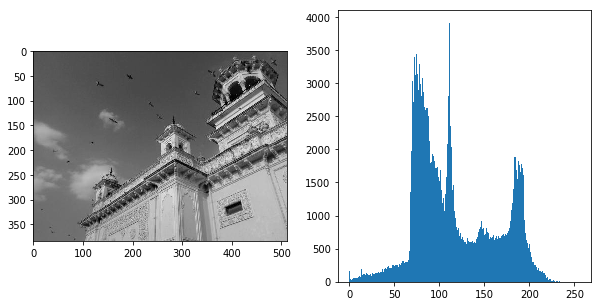

In [10]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('home.jpg',0)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img,'gray')
plt.subplot(1,2,2)
plt.hist(img.ravel(),256,[0,256])
plt.show()

別な方法として、matplotlibの通常のプロットを使いてもよい．この方法はカラー画像のヒストグラムの可視化に向いている．まず初めにヒストグラムを計算しておく必要がある．以下のコードを試してみよ:

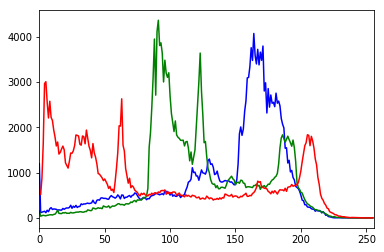

In [11]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('home.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

このヒストグラムを見ると，画像中の青成分が高い値を持っていることが分かる(空の色であることは明らかだろう)．

### 2. OpenCVを使う
この方法では、ヒストグラムのビン値によりヒストグラムを調整し，`cv2.line()` や `cv2.polyline()` を使って作成する．既に公式のOpenCV-Python2のサンプルに含まれているので、[コード](https://github.com/opencv/opencv/blob/master/samples/python/hist.py)を見てみてもらいたい

## マスクの適用
画像の全領域のヒストグラムを計算するために`cv2.calcHist()` 関数を使った．もしも画像中の特定領域のヒストグラムを計算したい時はどうすればいいだろうか?それには、ヒストグラムを計算したい領域を白，それ以外の領域を黒としたマスク画像を「マスク(mask)」に指定すれば計算できる．([対象図形](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/home.jpg))

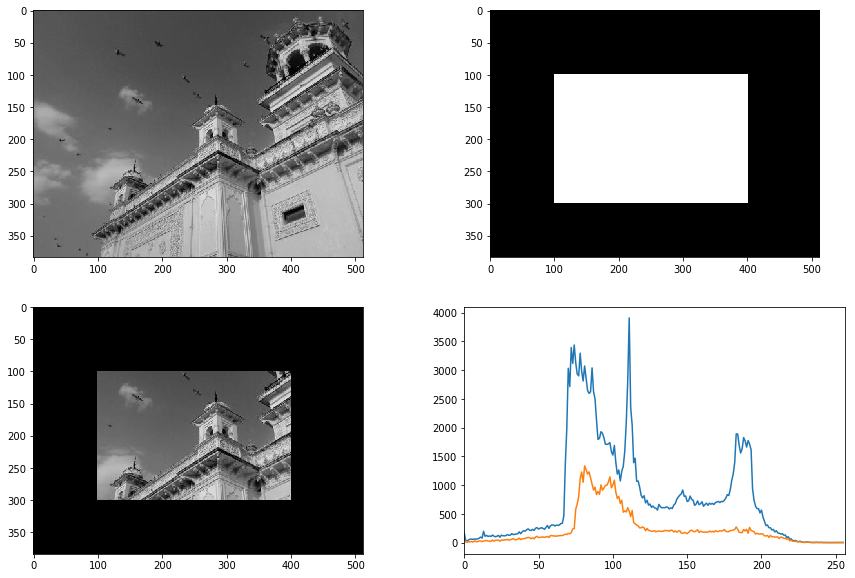

In [15]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('home.jpg',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.figure(figsize=(15,10))
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

結果を見てみよう．上のヒストグラムのうち，青線が画像全体のヒストグラム，橙線がマスク画像で指定した領域のヒストグラムを表している．

## 補足資料
1. [Cambridge in Color website](http://www.cambridgeincolour.com/tutorials/histograms1.htm)

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: [OpenCVでのヒストグラム](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/histogram.html) 
ヒストグラムについて学ぶ．
* 前の学習項目: 
OpenCVにおける輪郭(領域) http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/contours.html 
OpenCVが提供する輪郭に関連する様々なものを学ぶ．
<BR>[輪郭に関するいろいろな関数 contourMoreFunctions.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/contourMoreFunctions.html)<BR>
凸性の欠陥（convexity defects）， 多角形近似のテスト，形状のマッチング等について学ぶ．
* 次の学習項目: [ヒストグラム その2: ヒストグラム平坦化 histogramEqualization.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/histogramEqualization.html)<BR>
画像のコントラスト改善のためのヒストグラム平坦化
